In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [10]:
df1 = pd.read_excel('Data_clean/Locus_sensors/2.B53_testperiod_processed.xlsx')
df2 = pd.read_excel('Data_clean/Locus_sensors/2.B54_testperiod_processed.xlsx')
df3 = pd.read_excel('Data_clean/Locus_sensors/2.B55_testperiod_processed.xlsx')
df4 = pd.read_excel('Data_clean/Locus_sensors/2.B57_testperiod_processed.xlsx')

df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])
df3['Date'] = pd.to_datetime(df3['Date'])
df4['Date'] = pd.to_datetime(df4['Date'])

df1 = df1[(df1['Date'].dt.hour >= 10) & (df1['Date'].dt.hour <= 13)]
df2 = df2[(df2['Date'].dt.hour >= 10) & (df2['Date'].dt.hour <= 13)]
df3 = df3[(df3['Date'].dt.hour >= 10) & (df3['Date'].dt.hour <= 13)]
df4 = df4[(df4['Date'].dt.hour >= 10) & (df4['Date'].dt.hour <= 13)]
df1 = df1[df1['Count'] != 0]
df2 = df2[df2['Count'] != 0]
df3 = df3[df3['Count'] != 0]
# df4 = df4[df4['Count'] != 0]
window_size = 3
df1['Smoothed_Count'] = df1['Count'].rolling(window=window_size).mean()
df2['Smoothed_Count'] = df2['Count'].rolling(window=window_size).mean()
df3['Smoothed_Count'] = df3['Count'].rolling(window=window_size).mean()
df4['Smoothed_Count'] = df4['Count'].rolling(window=window_size).mean()
mean_3 = df3['Smoothed_Count'].mean() + 1
mean_4 = df4['Smoothed_Count'].mean()
plt.figure(figsize=(12, 6), dpi=1000)

plt.plot(df1['Date'], df1['Smoothed_Count'], label='Sensor 53')
plt.plot(df2['Date'], df2['Smoothed_Count'], label='Sensor 54')
plt.plot(df3['Date'], df3['Smoothed_Count'], label='1 pers', color='black', linestyle='-')
plt.plot(df4['Date'], df4['Smoothed_Count'], label='1 pers', color='black', linestyle='-')
plt.axhline(y=mean_3, color='black', linestyle='--')
# plt.axhline(y=mean_4, color='black', linestyle='-')

plt.title('Count Comparison')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()
print(mean_3, mean_4)

7.421568627450981 1.3214285714285714


In [3]:
testingdata = pd.read_excel('Data_clean/countsvspeople.xlsx')

In [4]:
testingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   121 non-null    int64
 1   People  121 non-null    int64
dtypes: int64(2)
memory usage: 2.0 KB


   Count  People
0      1       2
1     35       2
2     31       2
3     38       2
4     36       2
Mean Squared Error: 1.2175282745296894
R^2 Score: 0.04402616635545742


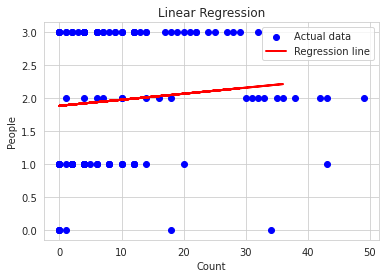

In [5]:
data = pd.read_excel('Data_clean/countsvspeople.xlsx')

# Display the first few rows of the data
print(data.head())

# Prepare the data
X = data[['Count']].values  # Feature: Count
y = data['People'].values   # Target: People

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot the results
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Count')
plt.ylabel('People')
plt.title('Linear Regression')
plt.legend()
plt.show()